<a href="https://colab.research.google.com/github/jeslynlamxy/dna-sequence-searching/blob/main/speed_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# getting files in
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [26]:
!ls '/content/gdrive/My Drive/NTU/CURRENT SEM/CZ2001 ALGO Project'

'ALOGO DNA'
'Copy of Presentation - Algo 1.gslides'
'Copy of Report - Algo 1.gdoc'
 covid_bf_searching_analysis.csv
 covid_bm_searching_analysis.csv
 covid.fna
 salmonella_bf_searching_analysis.csv
 salmonella_bm_searching_analysis.csv
 salmonella.fna
 search_algo.py
 search_benchmarking.py
 semi_brute_force.py
 speed_analysis.ipynb
 test_fixed_genome.csv
 test_fixed_query.csv
 tests_ran_on_one_plus_gigabyte_fna.txt


In [27]:
import os
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [43]:
data_dir = '/content/gdrive/My Drive/NTU/CURRENT SEM/CZ2001 ALGO Project'
test_fixed_genome = os.path.join(data_dir, 'test_fixed_genome.csv')
test_fixed_query = os.path.join(data_dir, 'test_fixed_query.csv')
bm_file = os.path.join(data_dir, 'covid_bm_searching_analysis.csv')

In [44]:
test_fixed_genome_df = pd.read_csv(test_fixed_genome)
test_fixed_query_df = pd.read_csv(test_fixed_query)

In [45]:
# getting data
def get_num_of_unique_chars(provided_string):
  return len(''.join(set(provided_string)))

df = pd.read_csv(bm_file)
df['Unique'] = df['Query'].apply(get_num_of_unique_chars)
df

,Unnamed: 0,Query,Query Length,Time Taken,Search Successful,Position Placed,Unique
0,0,A,1,0.01136,True,4867,1
1,1,AA,2,0.00748,True,2458,1
2,2,AAA,3,0.00529,True,2648,1
3,3,AAAA,4,0.00379,True,133,1
4,4,AAAAA,5,0.00309,True,4382,1
...,...,...,...,...,...,...,...
401,401,TGCATGCA,8,0.00362,True,1191,4
402,402,TGCATGCAT,9,0.00375,True,4268,4
403,403,TGCATGCATG,10,0.00414,True,3560,4
404,404,TGCATGCATGC,11,0.00352,True,232,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

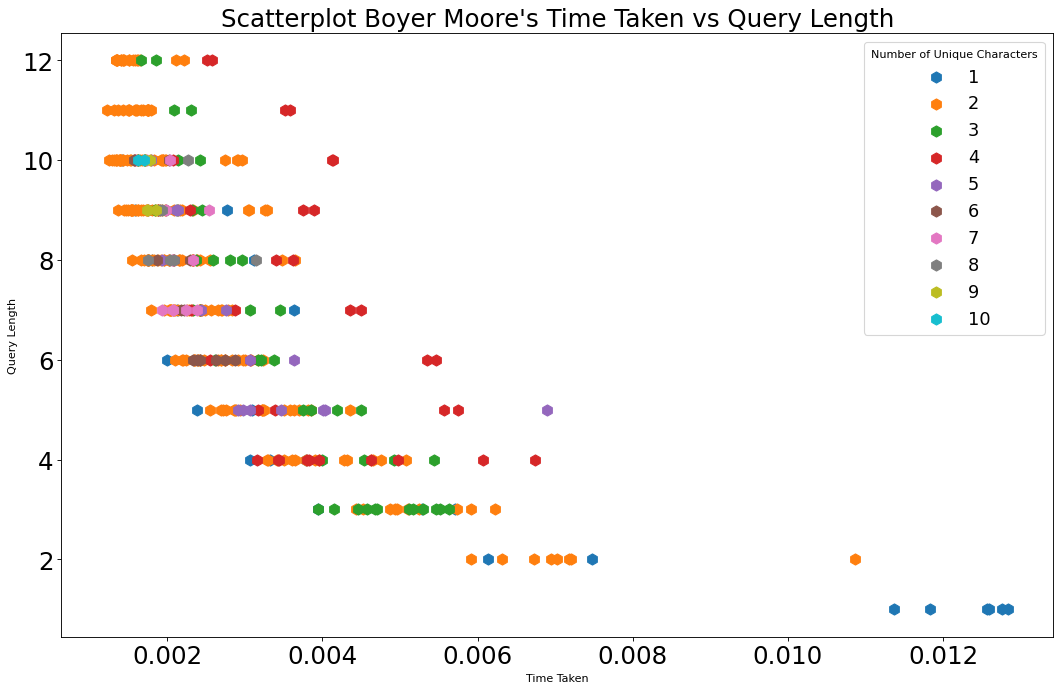

In [46]:
# Prepare Data 
categories = np.unique(df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=df.loc[df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Boyer Moore's Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()    

In [47]:
new_df = df.loc[df['Time Taken'] >= 0.008].sort_values(by=['Time Taken'], ascending=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


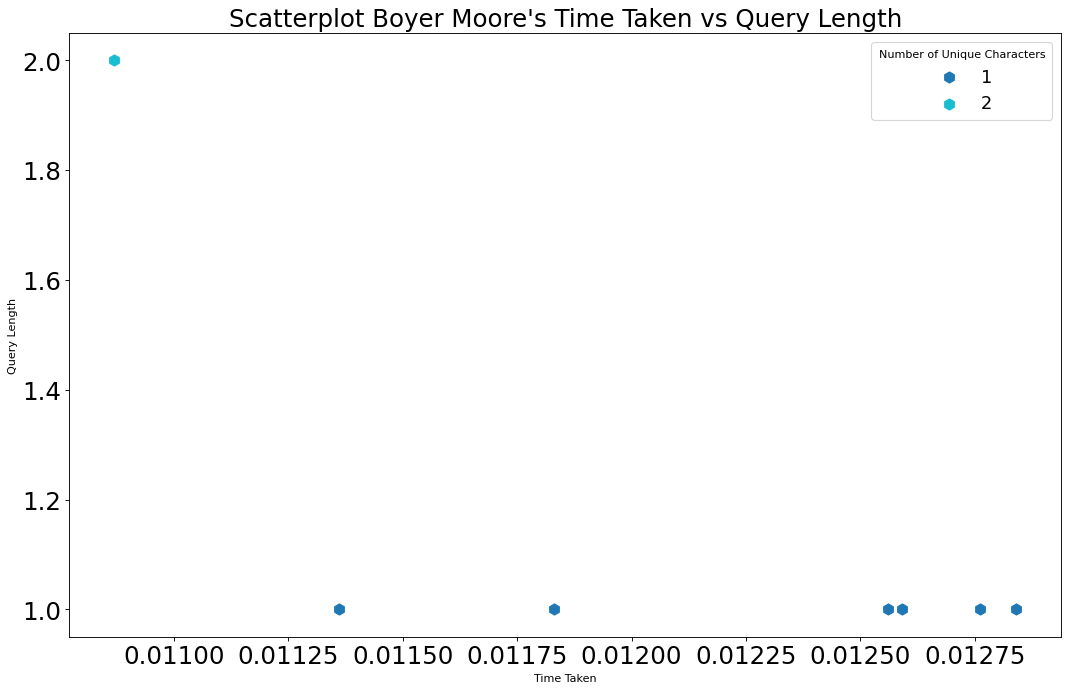

In [48]:
# Prepare Data 
categories = np.unique(new_df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=new_df.loc[new_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Boyer Moore's Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()  

In [49]:
# Analyse odd cases (why slower)
new_df.sort_values(by=['Time Taken'], ascending=False).head(5)

,Unnamed: 0,Query,Query Length,Time Taken,Search Successful,Position Placed,Unique
386,386,J,1,0.01284,True,608,1
356,356,D,1,0.01276,True,3482,1
366,366,E,1,0.01259,True,26,1
202,202,B,1,0.01256,True,3182,1
280,280,C,1,0.01183,True,584,1


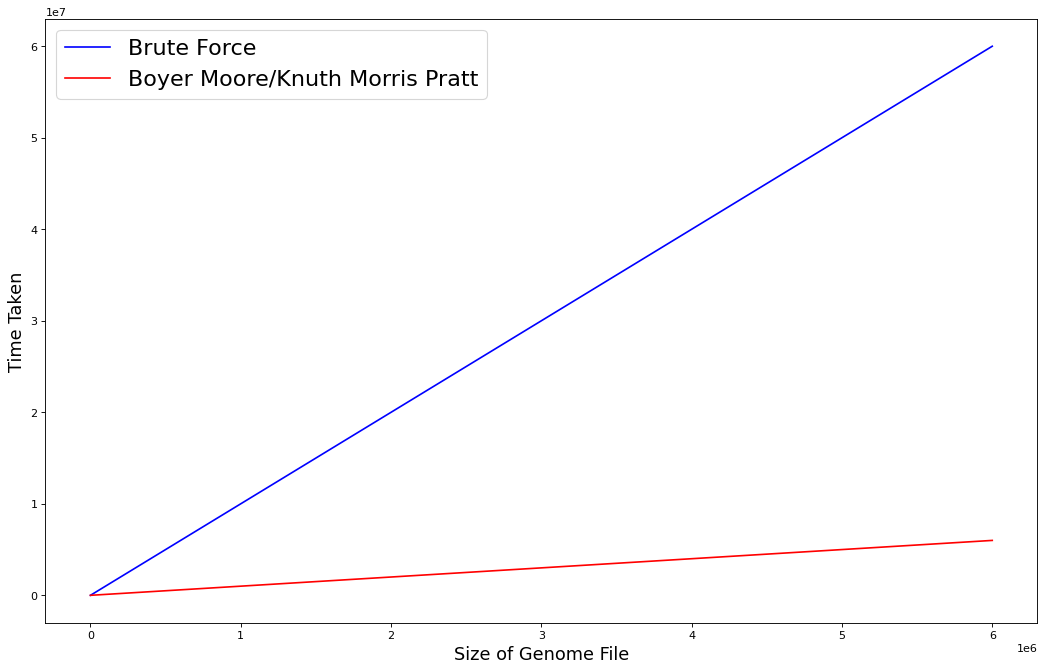

In [50]:
#  O(m*n). The m is the size of pattern and n is the size of the main string.
def bf(n, m):
    return m*(n-m+1)

def bm(n):
    return n

n = np.arange(0, 6000000)
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n, bf(n, 10), c="blue")
plt.plot(n, bm(n), c='red')
plt.xlabel('Size of Genome File', fontsize=16)
plt.ylabel('Time Taken', fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore/Knuth Morris Pratt'], loc='best', fontsize=20);

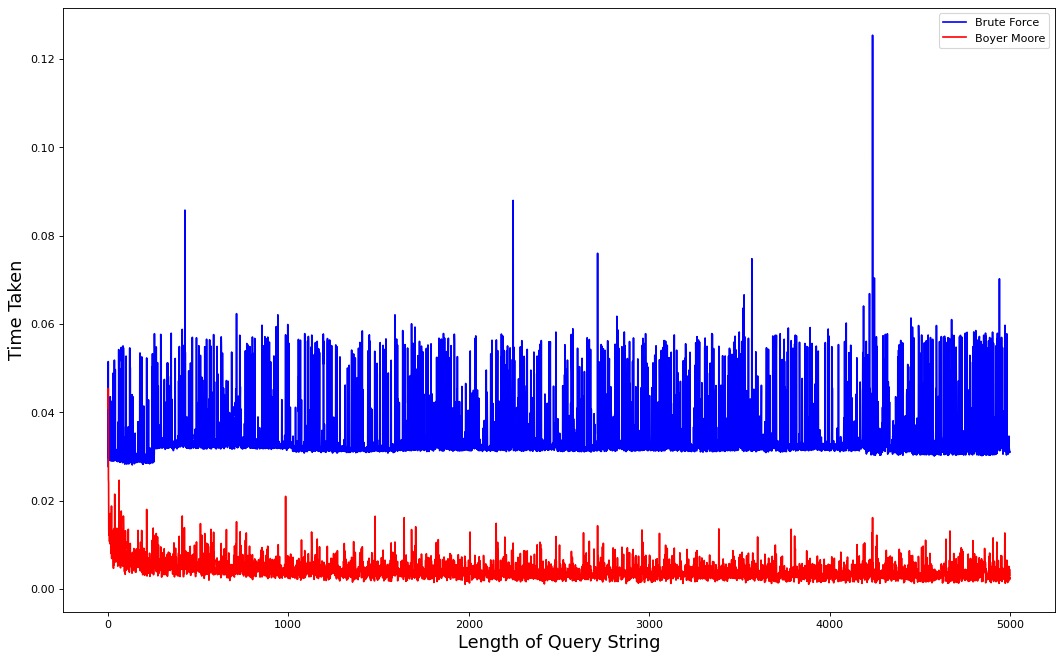

In [51]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['BF Time'], c='blue')
plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['BM Time'], c='red')
# plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['RK Time'], c='black')
plt.xlabel("Length of Query String", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Rabin Karp'], loc='best', fontsize=10)

In [52]:
new_test_fixed_genome_df = test_fixed_genome_df.loc[test_fixed_genome_df['BM Time'] >= 0.02].sort_values(by=['BF Time'], ascending=True)

In [53]:
# When bf faster than bm
new_test_fixed_genome_df.head()

,Unnamed: 0,Query Size,BF Time,BM Time,RK Time
0,0,1,0.02779,0.04099,0.15484
2,2,3,0.02979,0.02487,0.18997
37,37,38,0.02982,0.02150,0.21372
3,3,4,0.03129,0.02398,0.19766
1,1,2,0.05152,0.04545,0.20834


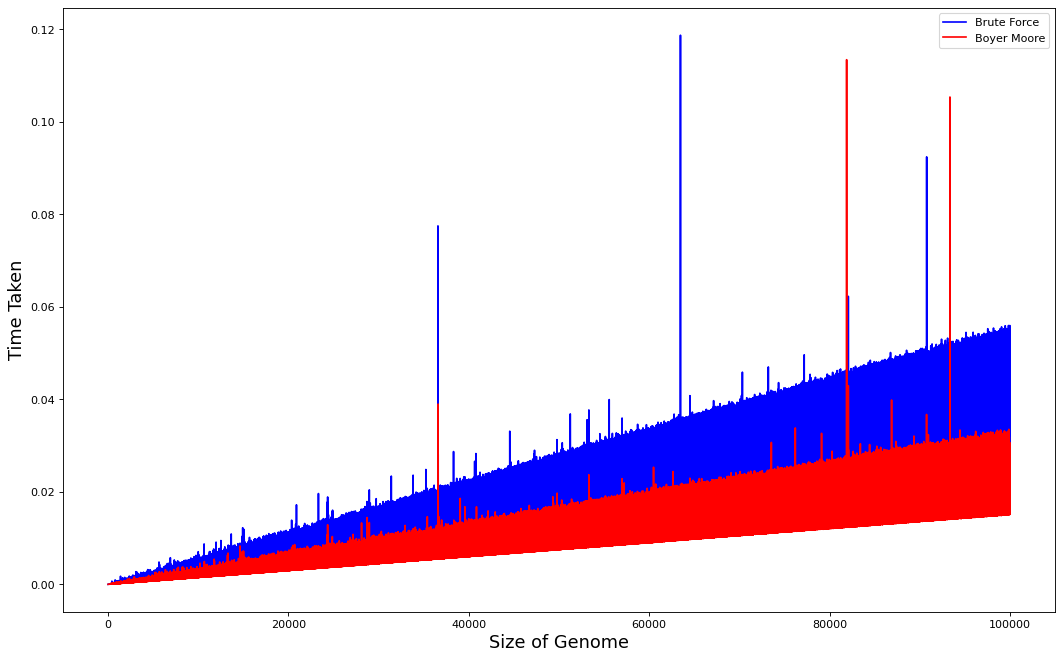

In [54]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(test_fixed_query_df['Genome Size'],  test_fixed_query_df['BF Time'], c='blue')
plt.plot(test_fixed_query_df['Genome Size'], test_fixed_query_df['BM Time'], c='red')
# plt.plot(test_fixed_query_df['Genome Size'], test_fixed_query_df['RK Time'], c='black')
plt.xlabel("Size of Genome", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Rabin Karp'], loc='best', fontsize=10);

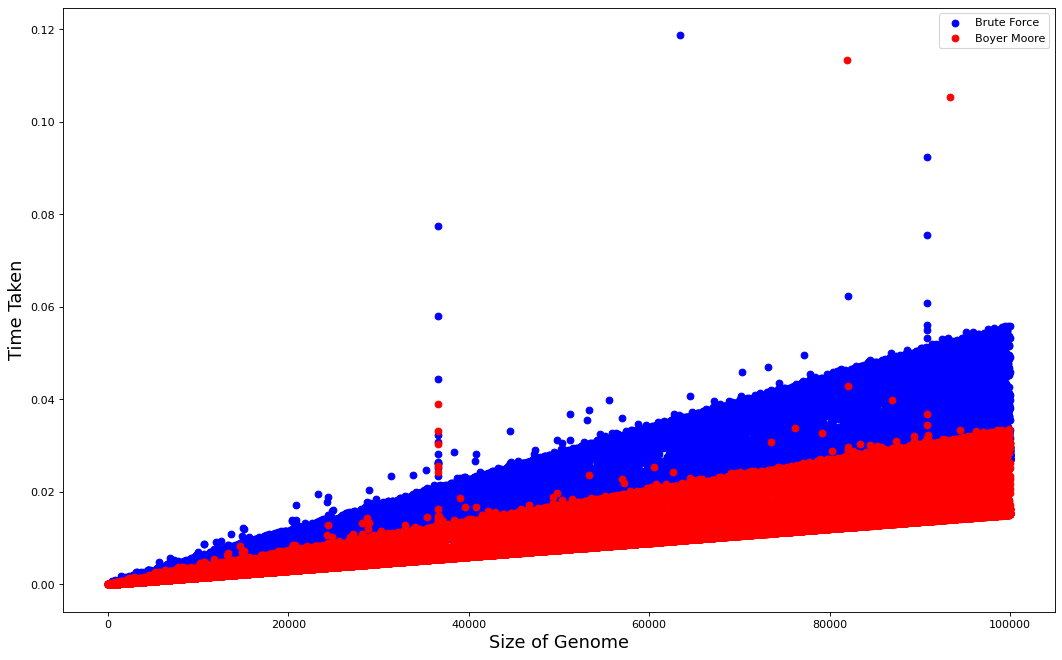

In [55]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(test_fixed_query_df['Genome Size'],  test_fixed_query_df['BF Time'], c='blue')
plt.scatter(test_fixed_query_df['Genome Size'], test_fixed_query_df['BM Time'], c='red')
# plt.plot(test_fixed_query_df['Genome Size'], test_fixed_query_df['RK Time'], c='black')
plt.xlabel("Size of Genome", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Rabin Karp'], loc='best', fontsize=10);

In [56]:
test_fixed_genome_df.head()

,Unnamed: 0,Query Size,BF Time,BM Time,RK Time
0,0,1,0.02779,0.04099,0.15484
1,1,2,0.05152,0.04545,0.20834
2,2,3,0.02979,0.02487,0.18997
3,3,4,0.03129,0.02398,0.19766
4,4,5,0.02911,0.01329,0.16431


In [57]:
test_fixed_query_df.head()

,Unnamed: 0,Genome Size,BF Time,BM Time,RK Time
0,0,10,0.00000,0.0,0.00001
1,1,11,0.00001,0.0,0.00001
2,2,12,0.00000,0.0,0.00001
3,3,13,0.00001,0.0,0.00002
4,4,14,0.00000,0.0,0.00002
